In [31]:
!pip install yfinance
import yfinance as yf

# Define the stock and date range
ticker = "TSLA"   # Apple Inc. stock ticker symbol
start_date = "2021-11-01"
end_date = "2024-11-01"

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the data
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            TSLA        TSLA        TSLA        TSLA        TSLA   
Date                                                                     
2021-11-01  402.863342  402.863342  403.250000  372.886658  381.666656   
2021-11-02  390.666656  390.666656  402.863342  382.000000  386.453339   
2021-11-03  404.619995  404.619995  405.130005  384.206665  392.443329   
2021-11-04  409.970001  409.970001  414.496674  405.666656  411.470001   
2021-11-05  407.363342  407.363342  413.290009  402.666656  409.333344   

Price          Volume  
Ticker           TSLA  
Date                   
2021-11-01  168146100  
2021-11-02  128213400  
2021-11-03  103885500  
2021-11-04   76192200  
2021-11-05   64886400  


In [32]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2021-11-01 to 2024-10-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, TSLA)  755 non-null    float64
 1   (Close, TSLA)      755 non-null    float64
 2   (High, TSLA)       755 non-null    float64
 3   (Low, TSLA)        755 non-null    float64
 4   (Open, TSLA)       755 non-null    float64
 5   (Volume, TSLA)     755 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.3 KB
None


<Figure size 1000x500 with 0 Axes>

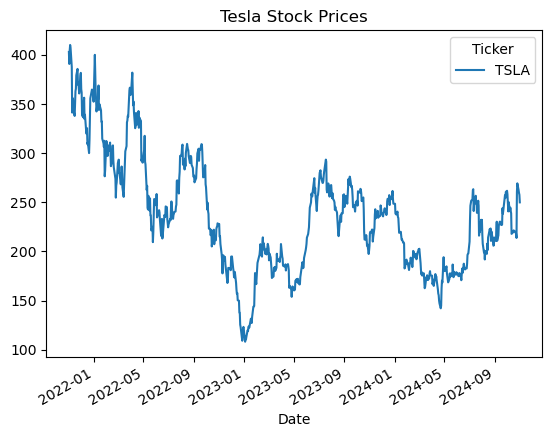

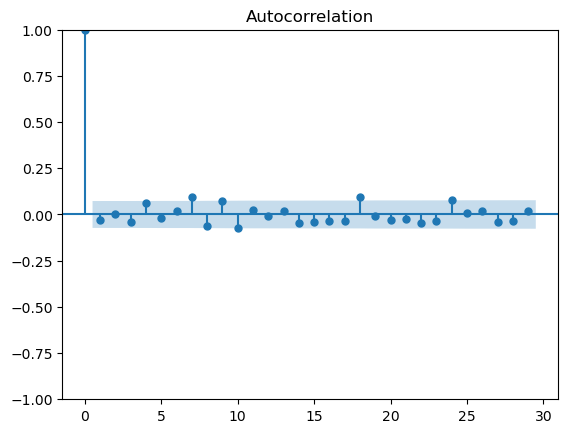

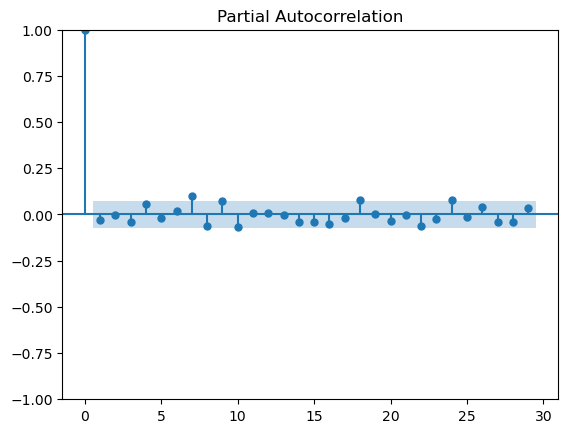

In [33]:
!pip install pmdarima
import yfinance as yf
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# 使用'Close'列
df = data['Close']

# 检查并处理可能的缺失值
df = df.dropna()

# 检查数据并绘制
plt.figure(figsize=(10, 5))
df.plot(title='Tesla Stock Prices')
plt.show()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# 划分训练集和测试集
train = df.iloc[:-30]
test = df.iloc[-30:]
plot_acf(train.diff().dropna())  # 对数据进行一阶差分处理
plot_pacf(train.diff().dropna())

plt.show()



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5279.433, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5280.725, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5280.724, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5277.841, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5282.724, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.633 seconds


c:\Users\xsy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\xsy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


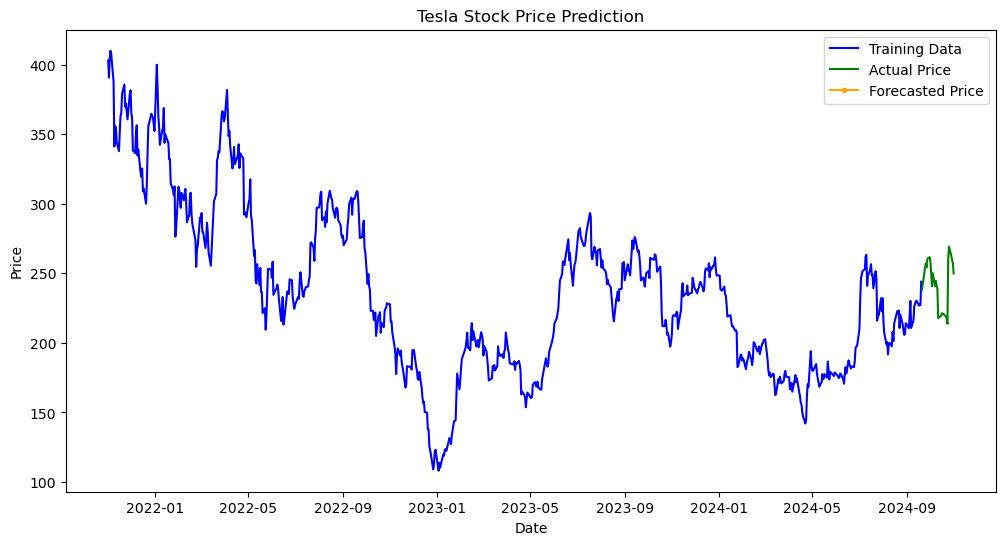

In [ ]:
# Devide train and test

#  Auto ARIMA model
model = auto_arima(train, order=(1, 1, 1), seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

    # predict 30 future points
forecast = model.predict(n_periods=30)

forecast_series = pd.Series(forecast, index=test.index)

# plt
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data', color='blue')
plt.plot(test, label='Actual Price', color='green')
plt.plot(forecast_series, label='Forecasted Price', color='orange', marker='o', markersize=3)
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [35]:

print(model.summary())
print(test.index)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  725
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2637.921
Date:                Sat, 14 Dec 2024   AIC                           5277.841
Time:                        23:27:27   BIC                           5282.426
Sample:                             0   HQIC                          5279.611
                                - 725                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        85.5605      2.933     29.171      0.000      79.812      91.309
Ljung-Box (L1) (Q):                   0.71   Jarque-Bera (JB):               225.66
Prob(Q):                              0.40   Pr

In [29]:

print(forecast_series)

Date
2024-09-20   NaN
2024-09-23   NaN
2024-09-24   NaN
2024-09-25   NaN
2024-09-26   NaN
2024-09-27   NaN
2024-09-30   NaN
2024-10-01   NaN
2024-10-02   NaN
2024-10-03   NaN
2024-10-04   NaN
2024-10-07   NaN
2024-10-08   NaN
2024-10-09   NaN
2024-10-10   NaN
2024-10-11   NaN
2024-10-14   NaN
2024-10-15   NaN
2024-10-16   NaN
2024-10-17   NaN
2024-10-18   NaN
2024-10-21   NaN
2024-10-22   NaN
2024-10-23   NaN
2024-10-24   NaN
2024-10-25   NaN
2024-10-28   NaN
2024-10-29   NaN
2024-10-30   NaN
2024-10-31   NaN
dtype: float64


## Random Forest

In [7]:

import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



In [9]:
!pip install yfinance
!pip install pandas_datareader
import yfinance as yf
import pandas_datareader as pdr

# Define the stock and date range
ticker = "TSLA"   # Tesla Inc. stock ticker symbol
start_date = "2021-11-01"
end_date = "2024-11-01"

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)
nasdaq = yf.download('^IXIC', start=start_date, end=end_date)
nasdaq = nasdaq['Adj Close']

# Get benchmark interest rates (e.g., 10-year U.S. Treasury rate)
fed_rate = pdr.get_data_fred('GS10', start_date, end_date)

# Display the first few rows of the data
print(data.head())
print(nasdaq)

import pandas as pd

# Ensure the index is in datetime format
data.index = pd.to_datetime(data.index)
nasdaq.index = pd.to_datetime(nasdaq.index)
fed_rate.index = pd.to_datetime(fed_rate.index)

# Explicitly set column names for consistency
data.columns = ['Close', 'Adj Close', 'High', 'Low', 'Open', 'Volume']

# Convert Nasdaq and Treasury rate data into DataFrames with specified column names
fed_rate_daily = pd.DataFrame(fed_rate.resample('D').ffill().reindex(data.index, method='ffill'))

# Merge data
combined_data = pd.concat([data, nasdaq, fed_rate_daily], axis=1)

# Rename columns
combined_data.rename(columns={'^IXIC': 'Nasdaq', 'GS10': 'fed_rate'}, inplace=True)

# Display the first few rows of the modified data to confirm changes
print(combined_data.head())

data = combined_data

# Calculate daily return
data['Daily Return'] = data['Adj Close'].pct_change()

# Compute lagged features
for i in range(1, 15):
    data[f'Lag_{i}'] = data['Adj Close'].shift(i)

# Compute moving averages
data['MA_5'] = data['Adj Close'].rolling(window=5).mean()
data['MA_10'] = data['Adj Close'].rolling(window=10).mean()

# Compute Relative Strength Index (RSI)
def compute_RSI(series, window=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = compute_RSI(data['Adj Close'], 14)

# Compute MACD
data['EMA_12'] = data['Adj Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Adj Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['Signal_line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Clean data
data.dropna(inplace=True)

# Compute daily range
data['Daily Range'] = data['High'] - data['Low']

# Compute intraday closing movement (difference between closing and opening prices)
data['Close Open Difference'] = data['Close'] - data['Open']

# Normalize price features (relative to the daily range)
data['Norm Close'] = (data['Close'] - data['Low']) / (data['High'] - data['Low'])
data['Norm Open'] = (data['Open'] - data['Low']) / (data['High'] - data['Low'])

# Define target variable
data['Target'] = (data['Adj Close'].shift(-1) > data['Adj Close']).astype(int)
data.dropna(inplace=True)  # Remove NaN values created during target generation

# Prepare features and target
X = data[['Daily Return', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6',
          'Lag_7', 'Lag_8', 'Lag_9', 'Lag_10', 'Lag_11', 'Lag_12', 'Lag_13', 'Lag_14',
          'MA_5', 'MA_10', 'RSI', 'MACD', 'Signal_line', 'Daily Range',
          'Close Open Difference', 'Norm Close', 'Norm Open', 'Nasdaq', 'fed_rate']]
y = data['Target']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate training accuracy
train_accuracy = model.score(X_train, y_train)
print(f"Training accuracy: {train_accuracy:.2f}")

# Predict and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy:.2f}")
print(classification_report(y_test, predictions))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            TSLA        TSLA        TSLA        TSLA        TSLA   
Date                                                                     
2021-11-01  402.863342  402.863342  403.250000  372.886658  381.666656   
2021-11-02  390.666656  390.666656  402.863342  382.000000  386.453339   
2021-11-03  404.619995  404.619995  405.130005  384.206665  392.443329   
2021-11-04  409.970001  409.970001  414.496674  405.666656  411.470001   
2021-11-05  407.363342  407.363342  413.290009  402.666656  409.333344   

Price          Volume  
Ticker           TSLA  
Date                   
2021-11-01  168146100  
2021-11-02  128213400  
2021-11-03  103885500  
2021-11-04   76192200  
2021-11-05   64886400  
Ticker             ^IXIC
Date                    
2021-11-01  15595.919922
2021-11-02  15649.599609
2021-11-03  15811.580078
2021-11-04  15940.309570
2021-11-05  15971.589844
...                  ...
2024-10-25  185

In [10]:
import numpy as np

# Retrieve and sort feature importances
importances = model.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(importances)[::-1]

# Print feature importances
print("Feature importances:")
for index in sorted_indices:
    print(f"{feature_names[index]}: {importances[index]:.4f}")

# Calculate cumulative importances
cumulative_importances = np.cumsum(importances[sorted_indices])
print("Cumulative Importances:")
print(cumulative_importances)

# Find the number of features needed to reach 95% cumulative importance
threshold_index = np.where(cumulative_importances > 0.95)[0][0] + 1
print("Number of features for 95% importance:", threshold_index)

# Select features based on importance
X_train_reduced = X_train.iloc[:, sorted_indices[:threshold_index]]
X_test_reduced = X_test.iloc[:, sorted_indices[:threshold_index]]


Feature importances:
Norm Close: 0.0543
Daily Return: 0.0523
Daily Range: 0.0510
RSI: 0.0470
Close Open Difference: 0.0458
Norm Open: 0.0440
Signal_line: 0.0432
Lag_13: 0.0431
MACD: 0.0430
Lag_14: 0.0391
Nasdaq: 0.0383
Lag_8: 0.0377
Lag_10: 0.0377
Lag_4: 0.0369
Lag_9: 0.0368
Lag_11: 0.0364
Lag_12: 0.0363
Lag_5: 0.0356
Lag_2: 0.0338
Lag_1: 0.0337
MA_10: 0.0323
Lag_7: 0.0317
Lag_6: 0.0303
Lag_3: 0.0300
MA_5: 0.0288
fed_rate: 0.0208
Cumulative Importances:
[0.05430233 0.1065773  0.15754123 0.20456346 0.25031606 0.29434264
 0.33753386 0.38066431 0.42364982 0.46271805 0.50101708 0.53874858
 0.57645607 0.61338508 0.65022185 0.68664144 0.72292449 0.75853901
 0.79235897 0.82602487 0.85832054 0.89002678 0.92032695 0.95036601
 0.97919973 1.        ]
Number of features for 95% importance: 24


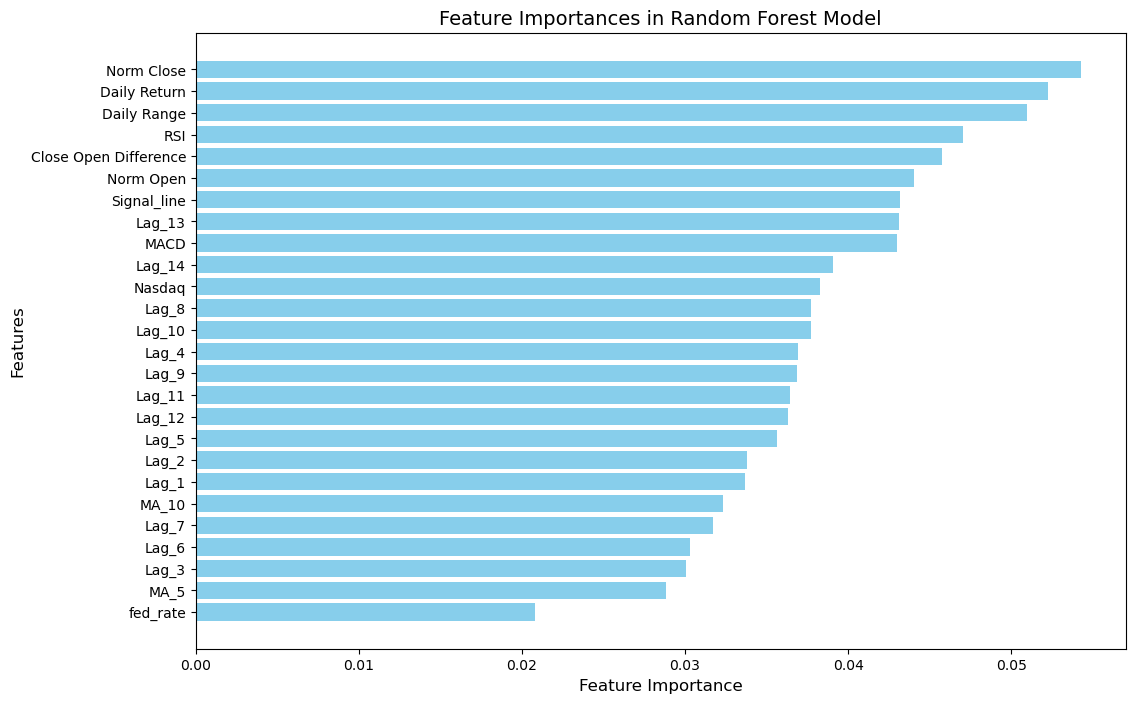

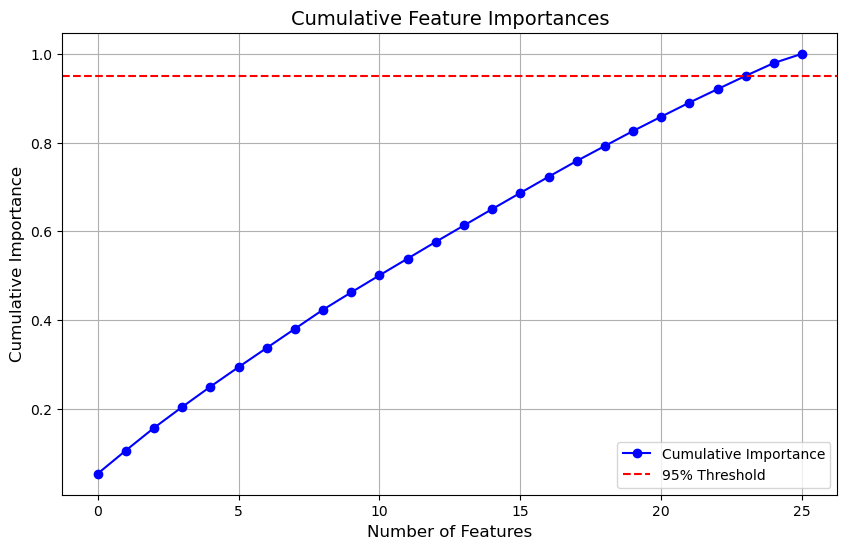

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Retrieve and sort feature importances
importances = model.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(importances)[::-1]

# Sorted features and their importances
sorted_feature_names = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

# Plot a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(sorted_feature_names, sorted_importances, color="skyblue")
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importances in Random Forest Model", fontsize=14)
plt.gca().invert_yaxis()  # Invert the y-axis so the most important features are on top
plt.show()

# Plot the cumulative feature importance curve
cumulative_importances = np.cumsum(sorted_importances)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_importances, marker='o', linestyle='-', color='b', label='Cumulative Importance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')  # Threshold line for cumulative importance
plt.xlabel("Number of Features", fontsize=12)
plt.ylabel("Cumulative Importance", fontsize=12)
plt.title("Cumulative Feature Importances", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()



In [12]:
# Retrain the Random Forest model using the reduced feature set
model_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
model_reduced.fit(X_train_reduced, y_train)

# Evaluate the model
train_accuracy_reduced = model_reduced.score(X_train_reduced, y_train)
test_accuracy_reduced = model_reduced.score(X_test_reduced, y_test)
print(f"Training accuracy with reduced features: {train_accuracy_reduced:.2f}")
print(f"Test accuracy with reduced features: {test_accuracy_reduced:.2f}")



Training accuracy with reduced features: 1.00
Test accuracy with reduced features: 0.54


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

# Custom MSE scorer
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(model_reduced, X_train_reduced, y_train, cv=10, scoring=mse_scorer)

# Convert negative scores to positive since sklearn scoring assumes higher is better
cv_mse_scores = -cv_scores

# Output the MSE for each fold and the average MSE
print("MSE for each fold:")
print(cv_mse_scores)
print(f"Average MSE across 10 folds: {cv_mse_scores.mean():.4f}")



MSE for each fold:
[0.36666667 0.55       0.54237288 0.42372881 0.57627119 0.33898305
 0.42372881 0.45762712 0.44067797 0.42372881]
Average MSE across 10 folds: 0.4544


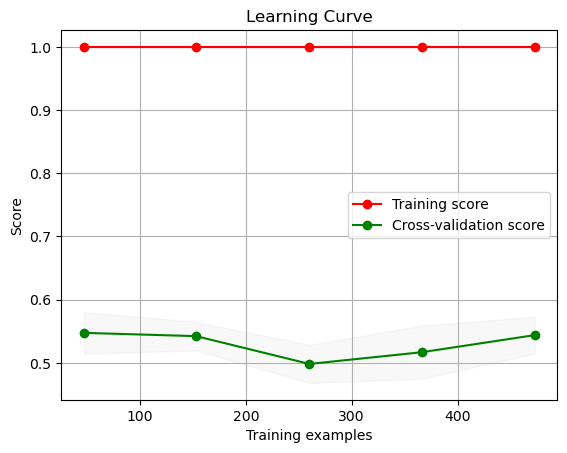

In [14]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, n_jobs=-1, cv=5, train_sizes=np.linspace(.1, 1.0, 5), verbose=0
)

# Calculate the mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot shaded areas for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="gray", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="gainsboro", alpha=0.2)

# Plot training and testing scores
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


## SVM

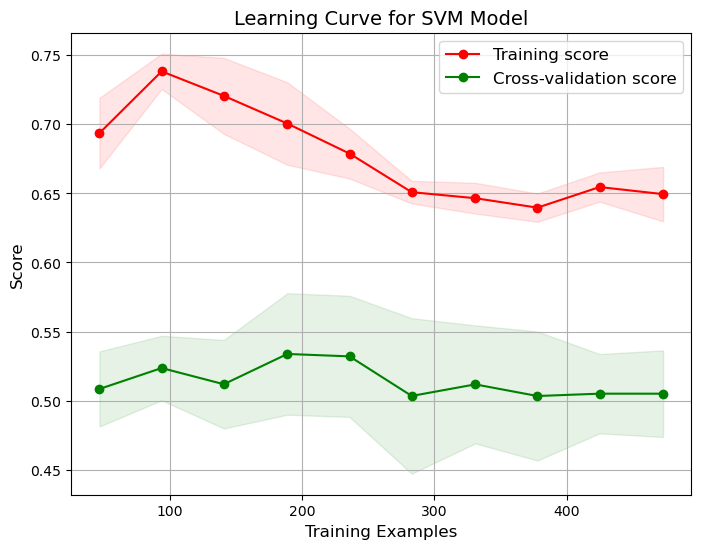

Model accuracy: 0.52
              precision    recall  f1-score   support

           0       0.48      0.61      0.54        69
           1       0.56      0.44      0.49        80

    accuracy                           0.52       149
   macro avg       0.52      0.52      0.52       149
weighted avg       0.53      0.52      0.51       149



In [76]:
# Define the SVM pipeline
svm_pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42))

# Fit the pipeline to the training data
svm_pipeline.fit(X_train, y_train)  # This fits both the scaler and the SVM model within the pipeline

# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    svm_pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and cross-validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')

# Add plot details
plt.title('Learning Curve for SVM Model', fontsize=14)
plt.xlabel('Training Examples', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.show()

# Standard evaluation
predictions = svm_pipeline.predict(X_test)  # This now works because the pipeline has been fitted
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy:.2f}")
print(classification_report(y_test, predictions))




In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],           # Penalty parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Gamma parameter for the RBF kernel
    'kernel': ['rbf']                # Set the kernel function to RBF
}

# Use GridSearchCV with cross-validation to find the best parameters
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

# Output the best parameters
print("Best Parameters:", grid.best_params_)

# Predict on the test set using the best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Output model evaluation results
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))





Best Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Test Accuracy: 0.5033557046979866
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.39      0.42        69
           1       0.53      0.60      0.56        80

    accuracy                           0.50       149
   macro avg       0.50      0.50      0.49       149
weighted avg       0.50      0.50      0.50       149



In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

# Define a custom MSE scorer
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform 10-fold cross-validation using the best model from GridSearchCV
cv_scores = cross_val_score(grid.best_estimator_, X_train, y_train, cv=10, scoring=mse_scorer)

# Convert negative values to positive, since sklearn's scoring assumes higher is better
cv_mse_scores = -cv_scores

# Output the MSE for each fold and the average MSE
print("MSE for each fold:")
print(cv_mse_scores)
print(f"Average MSE across 10 folds: {cv_mse_scores.mean():.4f}")



MSE for each fold:
[0.53333333 0.53333333 0.45762712 0.44067797 0.45762712 0.50847458
 0.42372881 0.44067797 0.47457627 0.38983051]
Average MSE across 10 folds: 0.4660


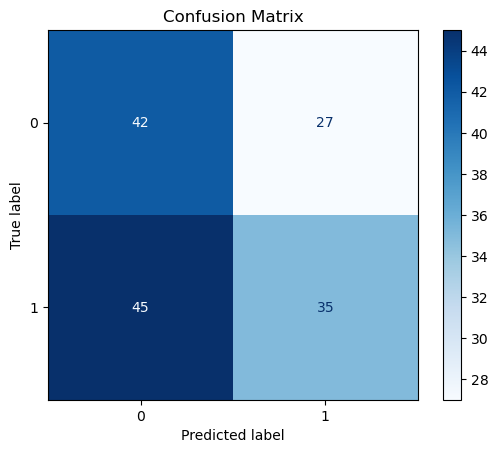

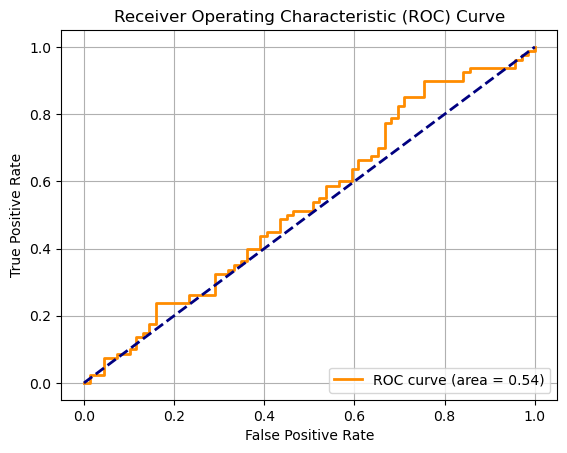

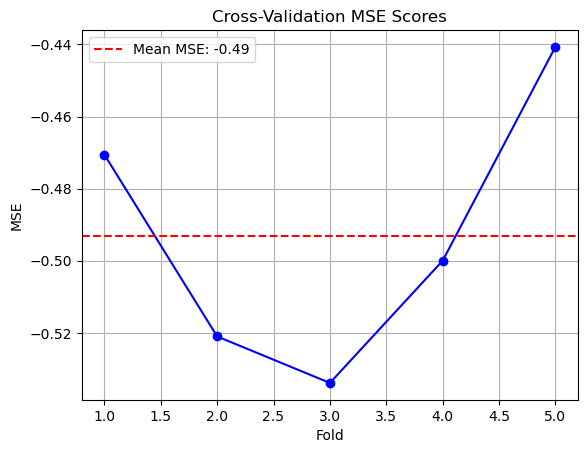

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc, confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(conf_matrix, display_labels=[0, 1]).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
if hasattr(svm_pipeline.named_steps['svc'], "decision_function"):
    y_scores = svm_pipeline.decision_function(X_test)
else:
    y_scores = svm_pipeline.predict_proba(X_test)[:, 1]  # For probability-based SVM models

fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Cross-Validation MSE Scores
plt.figure()
plt.plot(range(1, len(mse_scores) + 1), mse_scores, marker="o", linestyle="-", color="blue")
plt.axhline(y=mean_mse, color="red", linestyle="--", label=f"Mean MSE: {mean_mse:.2f}")
plt.xlabel("Fold")
plt.ylabel("MSE")
plt.title("Cross-Validation MSE Scores")
plt.legend()
plt.grid(True)
plt.show()


## LSTM

In [17]:
!pip install yfinance
!pip install pandas_datareader
import yfinance as yf
import pandas_datareader as pdr

# Define the stock and date range
ticker = "TSLA"   # Tesla Inc. stock ticker symbol
start_date = "2023-11-01"
end_date = "2024-11-01"

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)
nasdaq = yf.download('^IXIC', start=start_date, end=end_date)
nasdaq = nasdaq['Adj Close']

# Retrieve benchmark interest rates (e.g., 10-year U.S. Treasury rate)
fed_rate = pdr.get_data_fred('GS10', start_date, end_date)

# Display the first few rows of the data
print(data.head())
print(nasdaq)

import pandas as pd

# Load data and ensure the index is in datetime format
data.index = pd.to_datetime(data.index)
nasdaq.index = pd.to_datetime(nasdaq.index)
fed_rate.index = pd.to_datetime(fed_rate.index)

# Set all column names explicitly for consistency
data.columns = ['Close', 'Adj Close', 'High', 'Low', 'Open', 'Volume']

# Convert Nasdaq and Treasury rate data to DataFrame and set column names
fed_rate_daily = pd.DataFrame(fed_rate.resample('D').ffill().reindex(data.index, method='ffill'))

# Merge data
combined_data = pd.concat([data, nasdaq, fed_rate_daily], axis=1)

# Rename columns
combined_data.rename(columns={'^IXIC': 'Nasdaq', 'GS10': 'fed_rate'}, inplace=True)

# Display the first few rows of the modified data to confirm changes
print(combined_data.head())
data = combined_data

# Calculate daily returns
data['Daily Return'] = data['Adj Close'].pct_change()

# Calculate lagged features
for i in range(1, 15):
    data[f'Lag_{i}'] = data['Adj Close'].shift(i)

# Calculate moving averages
data['MA_5'] = data['Adj Close'].rolling(window=5).mean()
data['MA_10'] = data['Adj Close'].rolling(window=10).mean()

# Compute Relative Strength Index (RSI)
def compute_RSI(series, window=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = compute_RSI(data['Adj Close'], 14)

# Calculate MACD
data['EMA_12'] = data['Adj Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Adj Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['Signal_line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Clean data
data.dropna(inplace=True)

# Calculate daily range
data['Daily Range'] = data['High'] - data['Low']

# Calculate intraday close change (difference between closing and opening prices)
data['Close Open Difference'] = data['Close'] - data['Open']

# Normalize price features (to express price relative to daily range)
data['Norm Close'] = (data['Close'] - data['Low']) / (data['High'] - data['Low'])
data['Norm Open'] = (data['Open'] - data['Low']) / (data['High'] - data['Low'])

# Define the target variable
data['Target'] = (data['Adj Close'].shift(-1) > data['Adj Close']).astype(int)
data.dropna(inplace=True)  # Remove NaN values created during target generation

# Prepare features and target
X = data[['Daily Return', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6', 'Lag_7', 'Lag_8', 'Lag_9', 
          'Lag_10', 'Lag_11', 'Lag_12', 'Lag_13', 'Lag_14', 'MA_5', 'MA_10', 'RSI', 'MACD', 'Signal_line', 
          'Daily Range', 'Close Open Difference', 'Norm Close', 'Norm Open', 'Nasdaq', 'fed_rate']]
y = data['Target']

# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            TSLA        TSLA        TSLA        TSLA        TSLA   
Date                                                                     
2023-11-01  205.660004  205.660004  205.990005  197.850006  204.039993   
2023-11-02  218.509995  218.509995  219.199997  211.449997  212.970001   
2023-11-03  219.960007  219.960007  226.369995  218.399994  221.149994   
2023-11-06  219.270004  219.270004  226.320007  215.000000  223.979996   
2023-11-07  222.179993  222.179993  223.119995  215.720001  219.979996   

Price          Volume  
Ticker           TSLA  
Date                   
2023-11-01  121661700  
2023-11-02  125987600  
2023-11-03  119281000  
2023-11-06  117335800  
2023-11-07  116900100  
Ticker             ^IXIC
Date                    
2023-11-01  13061.469727
2023-11-02  13294.190430
2023-11-03  13478.280273
2023-11-06  13518.780273
2023-11-07  13639.860352
...                  ...
2024-10-25  185

In [18]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import random as python_random
import tensorflow as tf

# Set seeds for reproducibility
np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

# Convert data to a format suitable for the LSTM model
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

results = []

# Define the time step range
for i in range(1, 200):
    time_steps = i

    # Create LSTM dataset
    X, y = create_dataset(data[data.columns.difference(['Target'])], data['Target'], time_steps)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the LSTM model structure
    model = Sequential([
        LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                        validation_data=(X_test, y_test), 
                        callbacks=[early_stopping], verbose=1)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Time lag {i}: Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

    # Append results
    results.append((i, loss, accuracy))

# Identify the best time step based on accuracy
max_accuracy_index = np.argmax([acc for _, _, acc in results])
best_time_step, best_loss, best_accuracy = results[max_accuracy_index]

print(f"Best Time Lag {best_time_step}: Loss: {best_loss:.4f}, Accuracy: {best_accuracy:.4f}")





Epoch 1/50


c:\Users\xsy\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5133 - loss: 0.7138 - val_accuracy: 0.6458 - val_loss: 0.6681
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5487 - loss: 0.7067 - val_accuracy: 0.6458 - val_loss: 0.6720
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5539 - loss: 0.6921 - val_accuracy: 0.6458 - val_loss: 0.6764
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4778 - loss: 0.7158 - val_accuracy: 0.6458 - val_loss: 0.6810
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4070 - loss: 0.7221 - val_accuracy: 0.6458 - val_loss: 0.6854
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5011 - loss: 0.7008 - val_accuracy: 0.6458 - val_loss: 0.6896
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3958 - loss: 0.7242 - val_accuracy: 0.3542 - val_loss: 0.6934
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4708 - loss: 0.7139 - val_accuracy: 0.3542 - val_loss: 0.6972
Epoch 9/50
6/6 ━━━

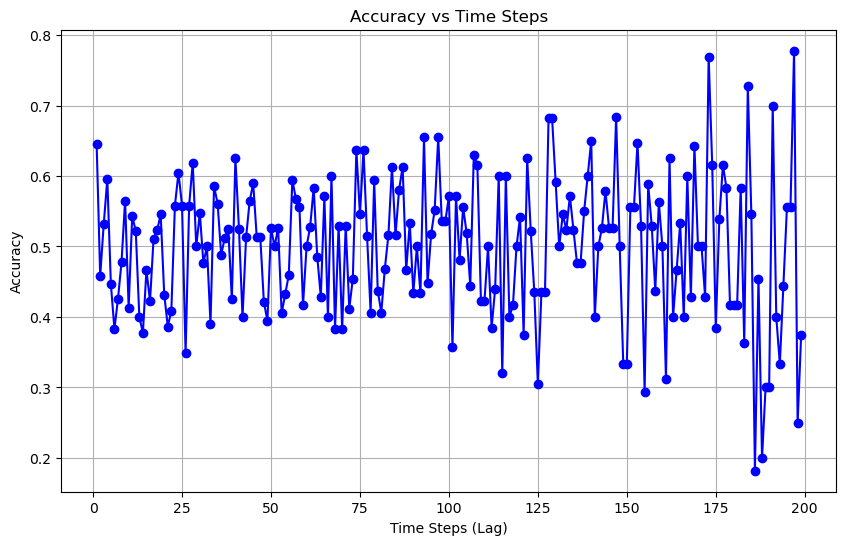

In [19]:
import matplotlib.pyplot as plt

# Assuming results is the data collected from the above model
# results = [(i, loss, accuracy) for i, loss, accuracy in results]

# Extract time steps and accuracies
time_steps = [x[0] for x in results]
accuracies = [x[2] for x in results]

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(time_steps, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs Time Steps')
plt.xlabel('Time Steps (Lag)')
plt.ylabel('Accuracy')
plt.grid(True)

# Display the plot
plt.show()
